## DS 3021 Project Part 1: Wrangling/EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**What is in your data?**

We want to look at a medical dataset of some kind and have looked a few so far that we're interested in. The first one is about anxiety and depression and looks at various groups symptoms of depressive/anxiety disorder based on age, sex, education, ethnicity, and state.

In [38]:
# Load data
df = pd.read_csv('AnxietyDepression.csv')
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [39]:
# Show Variables
print(df.columns)

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')


In [40]:
# Variables, Data Types, and Non-Null Values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16794 entries, 0 to 16793
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               16794 non-null  object 
 1   Group                   16794 non-null  object 
 2   State                   16794 non-null  object 
 3   Subgroup                16794 non-null  object 
 4   Phase                   16794 non-null  object 
 5   Time Period             16794 non-null  int64  
 6   Time Period Label       16794 non-null  object 
 7   Time Period Start Date  16794 non-null  object 
 8   Time Period End Date    16794 non-null  object 
 9   Value                   16087 non-null  float64
 10  Low CI                  16087 non-null  float64
 11  High CI                 16087 non-null  float64
 12  Confidence Interval     16087 non-null  object 
 13  Quartile Range          11017 non-null  object 
dtypes: float64(3), int64(1), object(10)
me

**How will these data be useful for studying the phenomenon you're interested in?**

Although I am not completely sure what the specific phenomenon I want to focus on is from this data, I'm interested in looking into trends of how symptoms have changed over time, analyzing which age groups or states report higher rates of anxiety or depression, or impact of external factors such as certain time periods on anxiety/depression (such as the pandemic).

**Summary Statistics:**

In [41]:
# Summary of numeric data
df.describe()

,Time Period,Value,Low CI,High CI
count,16794.000000,16087.000000,16087.000000,16087.000000
mean,35.922830,28.140946,24.642270,31.893181
std,21.530312,8.951691,8.593666,9.481899
min,1.000000,4.600000,3.300000,6.000000
25%,17.000000,22.100000,18.700000,25.500000
50%,37.000000,27.700000,24.100000,31.600000
75%,55.000000,33.400000,29.700000,37.400000
max,72.000000,85.200000,79.900000,89.500000


In [42]:
# Frequency of unique values in Group column
df['Group'].value_counts()

,count
Group,
By State,11016
By Age,1722
By Race/Hispanic ethnicity,1230
By Education,984
By Sex,492
By Gender identity,396
By Sexual orientation,396
By Disability status,312
National Estimate,246


In [43]:
# Frequency of unique values in Indicator column
df['Indicator'].value_counts()

,count
Indicator,
Symptoms of Depressive Disorder,5598
Symptoms of Anxiety Disorder,5598
Symptoms of Anxiety Disorder or Depressive Disorder,5598


**Visualizations:**

<Axes: >

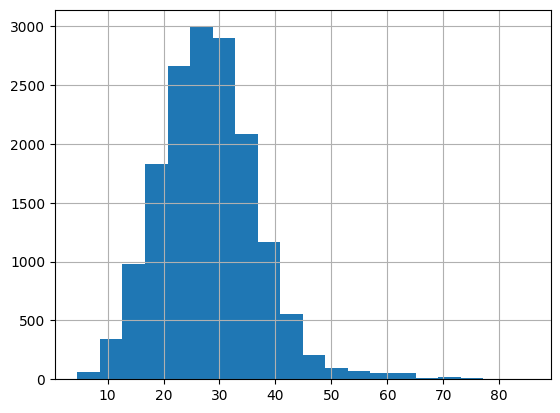

In [15]:
# Histogram of Value Column (anxiety and depression symptom percentages across all groups)
df['Value'].hist(bins = 20)

<Axes: xlabel='Time Period'>

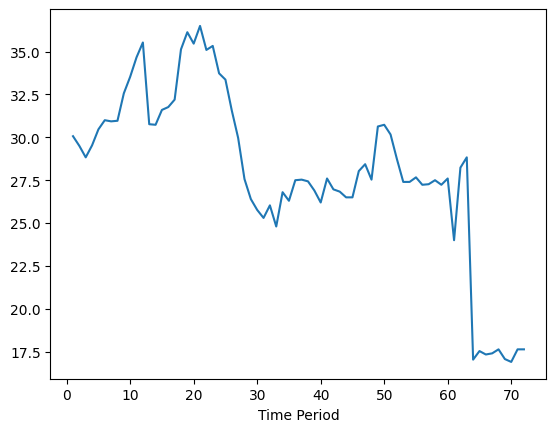

In [17]:
# Line plot of trends over time for national estimates of anxiety/depression disorder
df[df["Group"] == "National Estimate"].groupby("Time Period")["Value"].mean().plot()

<Axes: xlabel='Indicator'>

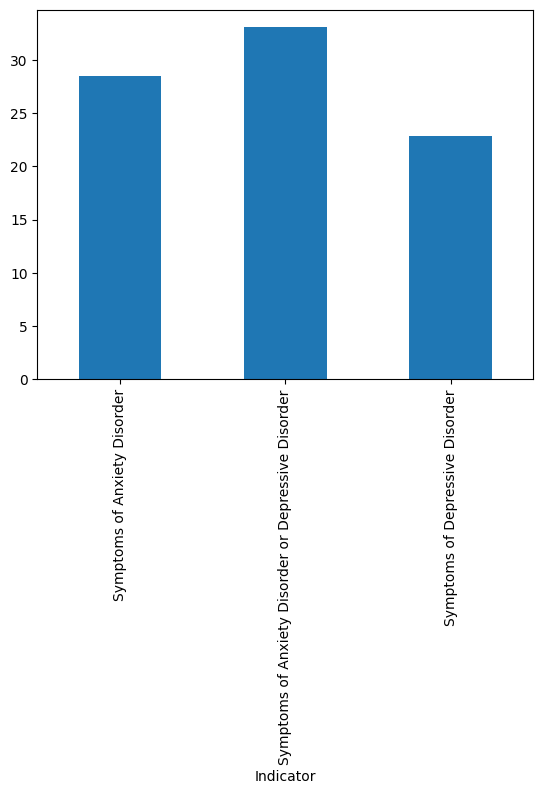

In [20]:
# Bar plot of anxiety vs. depression symptoms
df.groupby("Indicator")["Value"].mean().plot(kind="bar")

**What are the challenges you've resolved or expect to face in using them?**

- This data needs quite a bit of cleaning.

- We may have to handle some data quality issues such as missing values, time format standardization since some are in different formats, and the dataset includes overlapping subgroups in one column which could be hard to work with.

- Although I am interested in this topic, I may have some trouble understanding medical terms, lab/examination values, or how the different variables are connected.


**What is in your data? (Second option)**

This second dataset we're interested in is the brain stroke dataset and includes medical and lifestyle information related to brain strokes. Variables include gender, age, hypertension, heart disease, ever married, work type, residence type, avg glucode levels, bmi, smoking status, and whether they have had a stroke.

In [26]:
# Load data
df2 = pd.read_csv('brain_stroke.csv')
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [27]:
# Show Variables
print(df2.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [28]:
# Variables, Data Types, and Non-Null Values
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None


**How will these data be useful for studying the phenomenon you're interested in?**

A few ideas to look at in this dataset are the major risk factors for a stroke, age and stroke correlation, smoking and stroke correlation, urban vs. rural differences, and bmi and stroke risk.

In [30]:
# Summary of numeric data
df2.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [31]:
# Frequency of 0 and 1 values in stroke column
df2['stroke'].value_counts()

,count
stroke,
0,4733
1,248


In [32]:
# Average BMI by stroke status
df2.groupby("stroke")["bmi"].mean()

,bmi
stroke,
0,28.409698
1,30.186694


**Visualizations:**

<Axes: >

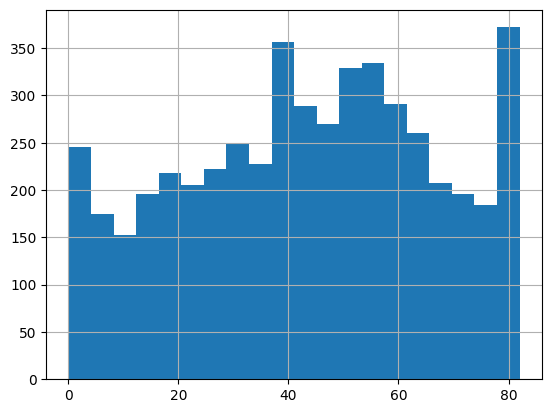

In [33]:
# Histogram of age distribution
df2["age"].hist(bins=20)

<Axes: xlabel='bmi', ylabel='Density'>

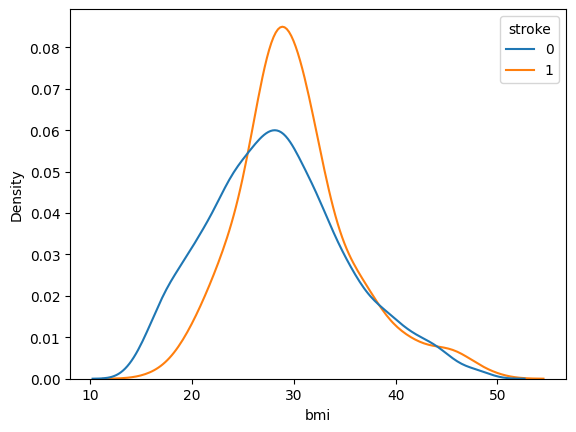

In [35]:
# KDE plot of BMI by stroke status
sns.kdeplot(data = df2, x = 'bmi', hue = 'stroke', common_norm = False)

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

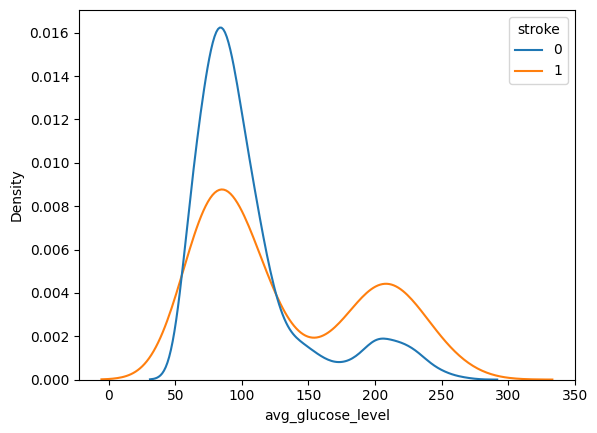

In [36]:
# KDE plot of average glucode levels by stroke status
sns.kdeplot(data = df2, x = 'avg_glucose_level', hue = 'stroke', common_norm = False)

**What are the challenges you've resolved or expect to face in using them?**

- The data includes a lot more non-stroke data then those who have had a stroke so there may not be enough to find meaningful insights.

- There is potention for confounding variables in this data set, some variables like age or smoking status may be correlated, so we need to be careful in our analysis to isolate their effects.

- Many variables in this dataset are categorical which may make the statistical analysis slightly more difficult.
